In [1]:
!pip install ..\abides-core
!pip install ..\abides-markets

Processing c:\users\marek.koza\abides-jpmc-public\abides-core
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for abides-core: filename=abides_core-0.0.0-py3-none-any.whl size=29788 sha256=fa8d5a3f22d5043e3399e8c4068673227bbb3e446a9a60802676ed17b442ea41
  Stored in directory: c:\users\marek.koza\appdata\local\pip\cache\wheels\e5\d3\5f\6b62065daab9aa95d51d1aa61064f7197b49211367d7397920
Successfully built abides-core
  Attempting uninstall: abides-core
    Found existing installation: abides-core 0.0.0
    Uninstalling abides-core-0.0.0:
      Successfully uninstalled abides-core-0.0.0


You should consider upgrading via the 'C:\Users\marek.koza\anaconda3\python.exe -m pip install --upgrade pip' command.


Processing c:\users\marek.koza\abides-jpmc-public\abides-markets
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for abides-markets: filename=abides_markets-0.0.0-py3-none-any.whl size=103808 sha256=c4d2a95fcc674b17396b11c0b7ba3716a51bf01628c37194d25043bc40f13912
  Stored in directory: c:\users\marek.koza\appdata\local\pip\cache\wheels\ae\69\89\d26c9b91cff29f90a91d001b39d390c1a64100b7611c9c9968

You should consider upgrading via the 'C:\Users\marek.koza\anaconda3\python.exe -m pip install --upgrade pip' command.



Successfully built abides-markets
  Attempting uninstall: abides-markets
    Found existing installation: abides-markets 0.0.0
    Uninstalling abides-markets-0.0.0:
      Successfully uninstalled abides-markets-0.0.0


In [2]:
from abides_markets.configs import rmsc04
from abides_core import abides
from abides_markets.utils import generate_latency_model
from abides_core.utils import get_wake_time, str_to_ns
from abides_core.network import BANetwork, CentralizedNetwork
from abides_markets.agents import InsiderValueAgent
from abides_markets.agents.network_agents import FollowerValueAgent, FollowerNoiseAgent
from itertools import count
from abides_markets.configs import communication

In [3]:
rmsc04_based_config = rmsc04.build_config()
base_config_agents_sum = len(rmsc04_based_config['agents'])
id_generator = count(1)

In [4]:
# najpierw generujemy centralized network: zakładam triady: powiedzmy na razie 1 insider skomunikowany z dwoma followerami 
insider_0 = InsiderValueAgent(id=next(id_generator),lambda_a=5.7e-12,horizon=str_to_ns("1h"))
follower_0 = FollowerValueAgent(id = next(id_generator),lambda_a=5.7e-12)
market_open = rmsc04_based_config['start_time'] + str_to_ns("11:30:00")
market_close = rmsc04_based_config['stop_time'] - str_to_ns("1s")
follower_1 = FollowerNoiseAgent(id = next(id_generator),wakeup_time = market_open)

In [5]:
starting_graph = CentralizedNetwork.construct_from_agent_list(central_agent=insider_0, agent_list=[follower_0, follower_1])

In [6]:
# generujemy pozostałych agentów, powiedzmy analogicznie 
all_follower_value_agents = [FollowerValueAgent(id = next(id_generator),lambda_a=5.7e-12) for i in range(50)]
all_follower_noise_agents =  [FollowerNoiseAgent(id = next(id_generator),wakeup_time = market_open) for i in range(500)]
agents = all_follower_value_agents
agents.extend(all_follower_noise_agents)

In [7]:
# generujemy graf 
complete_graph = BANetwork.construct_from_agent_list(starting_state=starting_graph, new_agents=agents, m= 2)
new_agents = sorted(complete_graph.agents, key = lambda agent: agent.id)

In [8]:
new_config = communication.build_config(complete_graph)
end_state_2 = abides.run(config=new_config)

[2504] INFO abides Simulation Start Time: 2023-06-13 14:14:15.246222
[2504] INFO abides_core.kernel --- Simulation time: 2021-02-05 00:00:00, messages processed: 0, wallclock elapsed: 0.00s ---
[2504] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:16:59, messages processed: 100,000, wallclock elapsed: 3.97s ---
[2504] INFO abides_core.kernel --- Simulation time: 2021-02-05 10:57:27, messages processed: 200,000, wallclock elapsed: 8.66s ---
[2504] INFO abides_core.kernel --- Simulation time: 2021-02-05 11:41:01, messages processed: 300,000, wallclock elapsed: 13.92s ---
[2504] INFO abides_core.kernel --- Simulation time: 2021-02-05 12:08:52, messages processed: 400,000, wallclock elapsed: 18.19s ---
[2504] INFO abides_core.kernel --- Simulation time: 2021-02-05 12:38:42, messages processed: 500,000, wallclock elapsed: 22.84s ---
[2504] INFO abides_core.kernel --- Simulation time: 2021-02-05 13:09:12, messages processed: 600,000, wallclock elapsed: 27.49s ---
[2504] INFO abid

In [9]:
sorted([agent.id for agent in new_config['agents']])

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [10]:
end_state_2['agents']

 ...]

In [11]:
# cena 

end_state_2['agents'][0].order_books['ABM']

In [12]:
from abides_core.utils import parse_logs_df, ns_date, str_to_ns, fmt_ts
logs_df = parse_logs_df(end_state_2)

In [13]:
logs_df.loc[logs_df['EventType']=='STARTING_CASH', 'ScalarEventValue'].unique()

array([100000, 10000000], dtype=object)

In [14]:
logs_df.loc[logs_df['EventType']=='FINAL_VALUATION',['agent_type', 'ScalarEventValue']].groupby('agent_type').mean()

ScalarEventValue
agent_type                         
FollowerNoiseAgent     73263.061649
FollowerValueAgent      1597.129889
InsiderValueAgent        2721.16196
NoiseAgent                 0.092206
ValueAgent               -11.114008

In [17]:
logs_df.loc[(logs_df['EventType']=='HOLDINGS_UPDATED'), ['EventTime', 'EventType', 'agent_id', 'agent_type', 'CASH', 'ABM']]

EventTime         EventType  agent_id         agent_type   
2     1612483200000000000  HOLDINGS_UPDATED         1  InsiderValueAgent  \
6     1612517813177467386  HOLDINGS_UPDATED         1  InsiderValueAgent   
10    1612518368372740425  HOLDINGS_UPDATED         1  InsiderValueAgent   
14    1612518597251922042  HOLDINGS_UPDATED         1  InsiderValueAgent   
18    1612518597809229892  HOLDINGS_UPDATED         1  InsiderValueAgent   
...                   ...               ...       ...                ...   
5715  1612540771742205961  HOLDINGS_UPDATED      1116      MomentumAgent   
5718                    0  HOLDINGS_UPDATED      1116      MomentumAgent   
5724  1612540781601271887  HOLDINGS_UPDATED      1116      MomentumAgent   
5726  1612540781601271937  HOLDINGS_UPDATED      1116      MomentumAgent   
5728  1612540781601271987  HOLDINGS_UPDATED      1116      MomentumAgent   

             CASH     ABM  
2        100000.0     NaN  
6       -699728.0     8.0  
10     -5098364.0    52.0  
14     -9497660.0    96.0  
18    -13896956.0   140.0  
...           ...     ...  
5715 -675999440.0  6791.0  
5718 -680715467.0  6838.0  
5724 -682521623.0  6856.0  
5726 -687137355.0  6902.0  
5728 -690749667.0  6938.0  

[43018 rows x 6 columns]

In [18]:
logs_df.loc[logs_df['EventType']=='ENDING_CASH']

EventTime    EventType ScalarEventValue  agent_id   
662   1612540800003784762  ENDING_CASH           308211         1  \
541   1612540800861283185  ENDING_CASH           125550         2   
6     1612540800004107025  ENDING_CASH           100000         3   
488   1612540800006983945  ENDING_CASH           203979         4   
573   1612540800860948148  ENDING_CASH           389060         5   
...                   ...          ...              ...       ...   
5231  1612540800000067292  ENDING_CASH          5923272      1112   
5670  1612540800007236951  ENDING_CASH          4431121      1113   
5499  1612540800000774861  ENDING_CASH          6139170      1114   
5637  1612540800004390346  ENDING_CASH          5619918      1115   
5733  1612540800000734328  ENDING_CASH          5374563      1116   

              agent_type EmptyEvent  CASH  ABM time_placed symbol  quantity   
662    InsiderValueAgent        NaN   NaN  NaN         NaN    NaN       NaN  \
541   FollowerValueAgent        NaN   NaN  NaN         NaN    NaN       NaN   
6     FollowerNoiseAgent        NaN   NaN  NaN         NaN    NaN       NaN   
488   FollowerValueAgent        NaN   NaN  NaN         NaN    NaN       NaN   
573   FollowerValueAgent        NaN   NaN  NaN         NaN    NaN       NaN   
...                  ...        ...   ...  ...         ...    ...       ...   
5231       MomentumAgent        NaN   NaN  NaN         NaN    NaN       NaN   
5670       MomentumAgent        NaN   NaN  NaN         NaN    NaN       NaN   
5499       MomentumAgent        NaN   NaN  NaN         NaN    NaN       NaN   
5637       MomentumAgent        NaN   NaN  NaN         NaN    NaN       NaN   
5733       MomentumAgent        NaN   NaN  NaN         NaN    NaN       NaN   

     side  order_id  fill_price  tag  limit_price is_hidden   
662   NaN       NaN         NaN  NaN          NaN       NaN  \
541   NaN       NaN         NaN  NaN          NaN       NaN   
6     NaN       NaN         NaN  NaN          NaN       NaN   
488   NaN       NaN         NaN  NaN          NaN       NaN   
573   NaN       NaN         NaN  NaN          NaN       NaN   
...   ...       ...         ...  ...          ...       ...   
5231  NaN       NaN         NaN  NaN          NaN       NaN   
5670  NaN       NaN         NaN  NaN          NaN       NaN   
5499  NaN       NaN         NaN  NaN          NaN       NaN   
5637  NaN       NaN         NaN  NaN          NaN       NaN   
5733  NaN       NaN         NaN  NaN          NaN       NaN   

     is_price_to_comply insert_by_id is_post_only  
662                 NaN          NaN          NaN  
541                 NaN          NaN          NaN  
6                   NaN          NaN          NaN  
488                 NaN          NaN          NaN  
573                 NaN          NaN          NaN  
...                 ...          ...          ...  
5231                NaN          NaN          NaN  
5670                NaN          NaN          NaN  
5499                NaN          NaN          NaN  
5637                NaN          NaN          NaN  
5733                NaN          NaN          NaN  

[1116 rows x 20 columns]

In [19]:
logs_df.loc[logs_df['EventType']=='FINAL_CASH_POSITION']

EventTime            EventType ScalarEventValue  agent_id   
659   1612540800003784762  FINAL_CASH_POSITION        274925106         1  \
538   1612540800861283185  FINAL_CASH_POSITION        217350825         2   
4     1612540800004107025  FINAL_CASH_POSITION           100000         3   
485   1612540800006983945  FINAL_CASH_POSITION        117194589         4   
570   1612540800860948148  FINAL_CASH_POSITION        156108980         5   
...                   ...                  ...              ...       ...   
5228  1612540800000067292  FINAL_CASH_POSITION       -501069483      1112   
5667  1612540800007236951  FINAL_CASH_POSITION       -223831004      1113   
5496  1612540800000774861  FINAL_CASH_POSITION       -778580865      1114   
5634  1612540800004390346  FINAL_CASH_POSITION       -643447197      1115   
5730  1612540800000734328  FINAL_CASH_POSITION       -690749667      1116   

              agent_type EmptyEvent  CASH  ABM time_placed symbol  quantity   
659    InsiderValueAgent        NaN   NaN  NaN         NaN    NaN       NaN  \
538   FollowerValueAgent        NaN   NaN  NaN         NaN    NaN       NaN   
4     FollowerNoiseAgent        NaN   NaN  NaN         NaN    NaN       NaN   
485   FollowerValueAgent        NaN   NaN  NaN         NaN    NaN       NaN   
570   FollowerValueAgent        NaN   NaN  NaN         NaN    NaN       NaN   
...                  ...        ...   ...  ...         ...    ...       ...   
5228       MomentumAgent        NaN   NaN  NaN         NaN    NaN       NaN   
5667       MomentumAgent        NaN   NaN  NaN         NaN    NaN       NaN   
5496       MomentumAgent        NaN   NaN  NaN         NaN    NaN       NaN   
5634       MomentumAgent        NaN   NaN  NaN         NaN    NaN       NaN   
5730       MomentumAgent        NaN   NaN  NaN         NaN    NaN       NaN   

     side  order_id  fill_price  tag  limit_price is_hidden   
659   NaN       NaN         NaN  NaN          NaN       NaN  \
538   NaN       NaN         NaN  NaN          NaN       NaN   
4     NaN       NaN         NaN  NaN          NaN       NaN   
485   NaN       NaN         NaN  NaN          NaN       NaN   
570   NaN       NaN         NaN  NaN          NaN       NaN   
...   ...       ...         ...  ...          ...       ...   
5228  NaN       NaN         NaN  NaN          NaN       NaN   
5667  NaN       NaN         NaN  NaN          NaN       NaN   
5496  NaN       NaN         NaN  NaN          NaN       NaN   
5634  NaN       NaN         NaN  NaN          NaN       NaN   
5730  NaN       NaN         NaN  NaN          NaN       NaN   

     is_price_to_comply insert_by_id is_post_only  
659                 NaN          NaN          NaN  
538                 NaN          NaN          NaN  
4                   NaN          NaN          NaN  
485                 NaN          NaN          NaN  
570                 NaN          NaN          NaN  
...                 ...          ...          ...  
5228                NaN          NaN          NaN  
5667                NaN          NaN          NaN  
5496                NaN          NaN          NaN  
5634                NaN          NaN          NaN  
5730                NaN          NaN          NaN  

[1116 rows x 20 columns]

In [20]:
logs_df.loc[logs_df['EventType']=='FINAL_HOLDINGS']

EventTime       EventType                 ScalarEventValue   
658   1612540800003784762  FINAL_HOLDINGS  { ABM: -2737, CASH: 274925106 }  \
537   1612540800861283185  FINAL_HOLDINGS  { ABM: -2165, CASH: 217350825 }   
3     1612540800004107025  FINAL_HOLDINGS                 { CASH: 100000 }   
484   1612540800006983945  FINAL_HOLDINGS  { ABM: -1166, CASH: 117194589 }   
569   1612540800860948148  FINAL_HOLDINGS  { ABM: -1552, CASH: 156108980 }   
...                   ...             ...                              ...   
5227  1612540800000067292  FINAL_HOLDINGS  { ABM: 5053, CASH: -501069483 }   
5666  1612540800007236951  FINAL_HOLDINGS  { ABM: 2275, CASH: -223831004 }   
5495  1612540800000774861  FINAL_HOLDINGS  { ABM: 7821, CASH: -778580865 }   
5633  1612540800004390346  FINAL_HOLDINGS  { ABM: 6469, CASH: -643447197 }   
5729  1612540800000734328  FINAL_HOLDINGS  { ABM: 6938, CASH: -690749667 }   

      agent_id          agent_type EmptyEvent  CASH  ABM time_placed symbol   
658          1   InsiderValueAgent        NaN   NaN  NaN         NaN    NaN  \
537          2  FollowerValueAgent        NaN   NaN  NaN         NaN    NaN   
3            3  FollowerNoiseAgent        NaN   NaN  NaN         NaN    NaN   
484          4  FollowerValueAgent        NaN   NaN  NaN         NaN    NaN   
569          5  FollowerValueAgent        NaN   NaN  NaN         NaN    NaN   
...        ...                 ...        ...   ...  ...         ...    ...   
5227      1112       MomentumAgent        NaN   NaN  NaN         NaN    NaN   
5666      1113       MomentumAgent        NaN   NaN  NaN         NaN    NaN   
5495      1114       MomentumAgent        NaN   NaN  NaN         NaN    NaN   
5633      1115       MomentumAgent        NaN   NaN  NaN         NaN    NaN   
5729      1116       MomentumAgent        NaN   NaN  NaN         NaN    NaN   

      quantity side  order_id  fill_price  tag  limit_price is_hidden   
658        NaN  NaN       NaN         NaN  NaN          NaN       NaN  \
537        NaN  NaN       NaN         NaN  NaN          NaN       NaN   
3          NaN  NaN       NaN         NaN  NaN          NaN       NaN   
484        NaN  NaN       NaN         NaN  NaN          NaN       NaN   
569        NaN  NaN       NaN         NaN  NaN          NaN       NaN   
...        ...  ...       ...         ...  ...          ...       ...   
5227       NaN  NaN       NaN         NaN  NaN          NaN       NaN   
5666       NaN  NaN       NaN         NaN  NaN          NaN       NaN   
5495       NaN  NaN       NaN         NaN  NaN          NaN       NaN   
5633       NaN  NaN       NaN         NaN  NaN          NaN       NaN   
5729       NaN  NaN       NaN         NaN  NaN          NaN       NaN   

     is_price_to_comply insert_by_id is_post_only  
658                 NaN          NaN          NaN  
537                 NaN          NaN          NaN  
3                   NaN          NaN          NaN  
484                 NaN          NaN          NaN  
569                 NaN          NaN          NaN  
...                 ...          ...          ...  
5227                NaN          NaN          NaN  
5666                NaN          NaN          NaN  
5495                NaN          NaN          NaN  
5633                NaN          NaN          NaN  
5729                NaN          NaN          NaN  

[1116 rows x 20 columns]

In [21]:
logs_df.loc[(logs_df['EventType']=='HOLDINGS_UPDATED')]

EventTime         EventType ScalarEventValue  agent_id   
2     1612483200000000000  HOLDINGS_UPDATED              NaN         1  \
6     1612517813177467386  HOLDINGS_UPDATED              NaN         1   
10    1612518368372740425  HOLDINGS_UPDATED              NaN         1   
14    1612518597251922042  HOLDINGS_UPDATED              NaN         1   
18    1612518597809229892  HOLDINGS_UPDATED              NaN         1   
...                   ...               ...              ...       ...   
5715  1612540771742205961  HOLDINGS_UPDATED              NaN      1116   
5718                    0  HOLDINGS_UPDATED              NaN      1116   
5724  1612540781601271887  HOLDINGS_UPDATED              NaN      1116   
5726  1612540781601271937  HOLDINGS_UPDATED              NaN      1116   
5728  1612540781601271987  HOLDINGS_UPDATED              NaN      1116   

             agent_type EmptyEvent         CASH     ABM time_placed symbol   
2     InsiderValueAgent        NaN     100000.0     NaN         NaN    NaN  \
6     InsiderValueAgent        NaN    -699728.0     8.0         NaN    NaN   
10    InsiderValueAgent        NaN   -5098364.0    52.0         NaN    NaN   
14    InsiderValueAgent        NaN   -9497660.0    96.0         NaN    NaN   
18    InsiderValueAgent        NaN  -13896956.0   140.0         NaN    NaN   
...                 ...        ...          ...     ...         ...    ...   
5715      MomentumAgent        NaN -675999440.0  6791.0         NaN    NaN   
5718      MomentumAgent        NaN -680715467.0  6838.0         NaN    NaN   
5724      MomentumAgent        NaN -682521623.0  6856.0         NaN    NaN   
5726      MomentumAgent        NaN -687137355.0  6902.0         NaN    NaN   
5728      MomentumAgent        NaN -690749667.0  6938.0         NaN    NaN   

      quantity side  order_id  fill_price  tag  limit_price is_hidden   
2          NaN  NaN       NaN         NaN  NaN          NaN       NaN  \
6          NaN  NaN       NaN         NaN  NaN          NaN       NaN   
10         NaN  NaN       NaN         NaN  NaN          NaN       NaN   
14         NaN  NaN       NaN         NaN  NaN          NaN       NaN   
18         NaN  NaN       NaN         NaN  NaN          NaN       NaN   
...        ...  ...       ...         ...  ...          ...       ...   
5715       NaN  NaN       NaN         NaN  NaN          NaN       NaN   
5718       NaN  NaN       NaN         NaN  NaN          NaN       NaN   
5724       NaN  NaN       NaN         NaN  NaN          NaN       NaN   
5726       NaN  NaN       NaN         NaN  NaN          NaN       NaN   
5728       NaN  NaN       NaN         NaN  NaN          NaN       NaN   

     is_price_to_comply insert_by_id is_post_only  
2                   NaN          NaN          NaN  
6                   NaN          NaN          NaN  
10                  NaN          NaN          NaN  
14                  NaN          NaN          NaN  
18                  NaN          NaN          NaN  
...                 ...          ...          ...  
5715                NaN          NaN          NaN  
5718                NaN          NaN          NaN  
5724                NaN          NaN          NaN  
5726                NaN          NaN          NaN  
5728                NaN          NaN          NaN  

[43018 rows x 20 columns]

In [22]:
logs_df.loc[(logs_df['EventType']=='ORDER_EXECUTED')]

EventTime       EventType ScalarEventValue  agent_id   
7                       0  ORDER_EXECUTED              NaN       554  \
10    1612523107570934548  ORDER_EXECUTED              NaN       554   
7                       0  ORDER_EXECUTED              NaN       555   
7                       0  ORDER_EXECUTED              NaN       556   
10    1612520376553958169  ORDER_EXECUTED              NaN       556   
...                   ...             ...              ...       ...   
5714  1612540771742205961  ORDER_EXECUTED              NaN      1116   
5717                    0  ORDER_EXECUTED              NaN      1116   
5723  1612540781601271887  ORDER_EXECUTED              NaN      1116   
5725  1612540781601271937  ORDER_EXECUTED              NaN      1116   
5727  1612540781601271987  ORDER_EXECUTED              NaN      1116   

         agent_type EmptyEvent  CASH  ABM          time_placed symbol   
7        NoiseAgent        NaN   NaN  NaN  2021-02-05 11:05:02    ABM  \
10       NoiseAgent        NaN   NaN  NaN  2021-02-05 11:05:02    ABM   
7        NoiseAgent        NaN   NaN  NaN  2021-02-05 15:45:41    ABM   
7        NoiseAgent        NaN   NaN  NaN  2021-02-05 10:10:06    ABM   
10       NoiseAgent        NaN   NaN  NaN  2021-02-05 10:10:06    ABM   
...             ...        ...   ...  ...                  ...    ...   
5714  MomentumAgent        NaN   NaN  NaN  2021-02-05 15:59:31    ABM   
5717  MomentumAgent        NaN   NaN  NaN  2021-02-05 15:59:31    ABM   
5723  MomentumAgent        NaN   NaN  NaN  2021-02-05 15:59:41    ABM   
5725  MomentumAgent        NaN   NaN  NaN  2021-02-05 15:59:41    ABM   
5727  MomentumAgent        NaN   NaN  NaN  2021-02-05 15:59:41    ABM   

      quantity      side  order_id  fill_price  tag  limit_price is_hidden   
7         82.0  Side.ASK    9869.0    100219.0  NaN     100219.0     False  \
10        18.0  Side.ASK    9869.0    100219.0  NaN     100219.0     False   
7         11.0  Side.ASK   43046.0    100084.0  NaN     100084.0     False   
7         73.0  Side.BID    3665.0    100056.0  NaN     100056.0     False   
10        27.0  Side.BID    3665.0    100056.0  NaN     100056.0     False   
...        ...       ...       ...         ...  ...          ...       ...   
5714      28.0  Side.BID   44485.0    100341.0  NaN     100341.0     False   
5717      47.0  Side.BID   44485.0    100341.0  NaN     100341.0     False   
5723      18.0  Side.BID   44493.0    100342.0  NaN     100342.0     False   
5725      46.0  Side.BID   44493.0    100342.0  NaN     100342.0     False   
5727      36.0  Side.BID   44493.0    100342.0  NaN     100342.0     False   

     is_price_to_comply insert_by_id is_post_only  
7                 False        False        False  
10                False        False        False  
7                 False        False        False  
7                 False        False        False  
10                False        False        False  
...                 ...          ...          ...  
5714              False        False        False  
5717              False        False        False  
5723              False        False        False  
5725              False        False        False  
5727              False        False        False  

[33907 rows x 20 columns]

In [23]:
logs_df['EventType'].unique()

array(['AGENT_TYPE', 'MarketClosePriceRequestMsg',
       'MarketHoursRequestMsg', 'BookImbalanceSubReqMsg',
       'QuerySpreadMsg', 'BEST_BID', 'LAST_TRADE', 'BEST_ASK',
       'QueryTransactedVolMsg', 'STARTING_CASH', 'HOLDINGS_UPDATED',
       'BID_DEPTH', 'ASK_DEPTH', 'IMBALANCE', 'FINAL_HOLDINGS',
       'FINAL_CASH_POSITION', 'MARK_TO_MARKET', 'MARKED_TO_MARKET',
       'ENDING_CASH', 'FINAL_VALUATION', 'ORDER_SUBMITTED',
       'ORDER_EXECUTED', 'ORDER_ACCEPTED', 'CANCEL_SUBMITTED',
       'ORDER_CANCELLED'], dtype=object)

In [24]:
g = complete_graph.generate_networkx_object()

In [25]:
g

In [26]:
import matplotlib.pyplot as plt

In [27]:
from abides_markets.agents.network_agents.utils import insider_network_plot

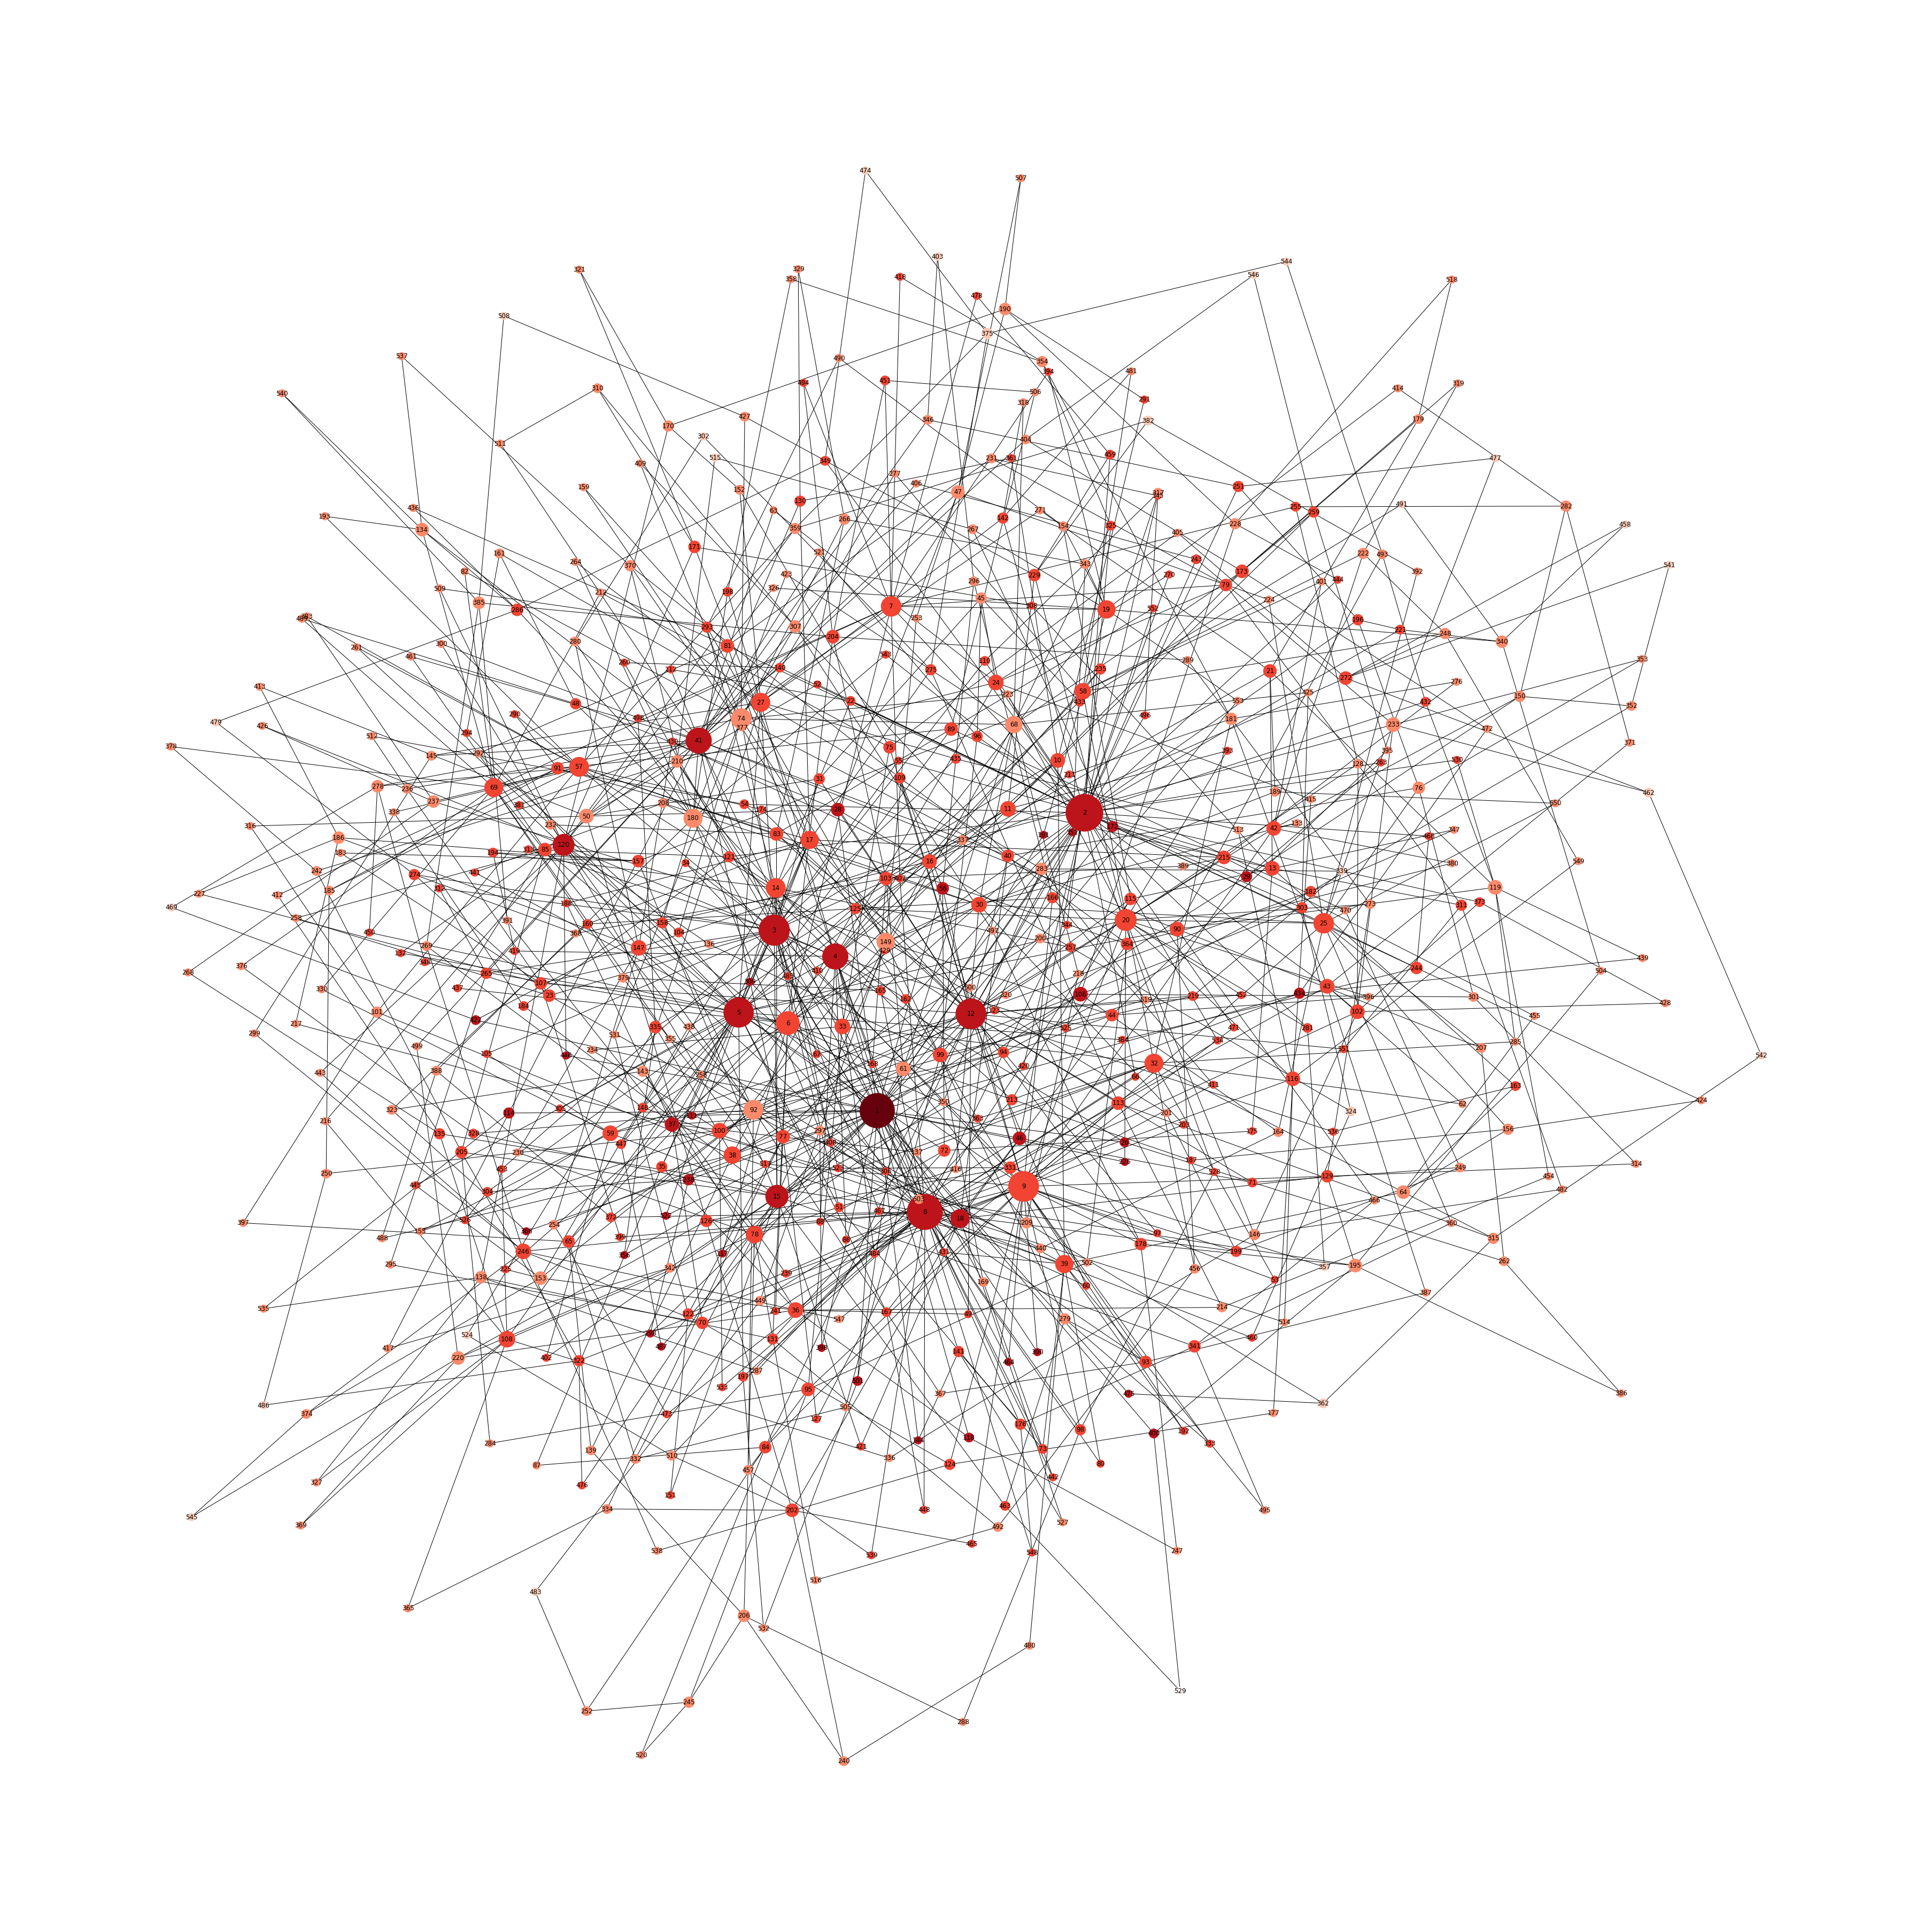

In [28]:
plt.figure(figsize=(50,50)) 
insider_network_plot(complete_graph)

In [29]:
logs_df.loc[(logs_df['EventType']=='HOLDINGS_UPDATED'), ['EventTime', 'EventType', 'agent_id', 'agent_type', 'CASH', 'ABM']]

EventTime         EventType  agent_id         agent_type   
2     1612483200000000000  HOLDINGS_UPDATED         1  InsiderValueAgent  \
6     1612517813177467386  HOLDINGS_UPDATED         1  InsiderValueAgent   
10    1612518368372740425  HOLDINGS_UPDATED         1  InsiderValueAgent   
14    1612518597251922042  HOLDINGS_UPDATED         1  InsiderValueAgent   
18    1612518597809229892  HOLDINGS_UPDATED         1  InsiderValueAgent   
...                   ...               ...       ...                ...   
5715  1612540771742205961  HOLDINGS_UPDATED      1116      MomentumAgent   
5718                    0  HOLDINGS_UPDATED      1116      MomentumAgent   
5724  1612540781601271887  HOLDINGS_UPDATED      1116      MomentumAgent   
5726  1612540781601271937  HOLDINGS_UPDATED      1116      MomentumAgent   
5728  1612540781601271987  HOLDINGS_UPDATED      1116      MomentumAgent   

             CASH     ABM  
2        100000.0     NaN  
6       -699728.0     8.0  
10     -5098364.0    52.0  
14     -9497660.0    96.0  
18    -13896956.0   140.0  
...           ...     ...  
5715 -675999440.0  6791.0  
5718 -680715467.0  6838.0  
5724 -682521623.0  6856.0  
5726 -687137355.0  6902.0  
5728 -690749667.0  6938.0  

[43018 rows x 6 columns]

In [31]:
import pandas as pd

In [37]:
final_surplus(logs_df)

ScalarEventValue              
EventType                    FINAL_VALUATION STARTING_CASH
agent_id agent_type                                       
1        InsiderValueAgent        2721.16196      100000.0
2        FollowerValueAgent       2150.43565      100000.0
3        FollowerNoiseAgent         100000.0      100000.0
4        FollowerValueAgent       1158.90629      100000.0
5        FollowerValueAgent         1544.037      100000.0
...                                      ...           ...
1112     MomentumAgent                   NaN    10000000.0
1113     MomentumAgent                   NaN    10000000.0
1114     MomentumAgent                   NaN    10000000.0
1115     MomentumAgent                   NaN    10000000.0
1116     MomentumAgent                   NaN    10000000.0

[1116 rows x 2 columns]